# Etude sur Alien vs. Predator - épisode 1

Développer un programme de vision par ordinateur capable de différencier avec précision un Alien d'un Predator.

L'avenir de l'espère humaine est donc entre les mains de la Promo 2 de Rennes de l'école Microsoft IA by Simplon qui doit développer un programme de vision par ordinateur capable de distinguer un Alien d'un Prédator et ainsi choisir la bonne application à utiliser pour se débarrasser de l'extraterrestre.

Pour cela, utiliser la démarche suivante :

    1. Télécharger le dataset adéquat sur le répertoire Teams de la promotion ;
    2. Implémenter et entrainer un CNN en utilisant la librairie Keras. Son architecture est la suivante :
    
        ayers.Conv2D(filters=16, kernel_size=3, strides=1, activation='relu', input_shape=(150, 150, 3))
        layers.MaxPooling2D(pool_size=(2, 2))
        layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu')
        layers.MaxPooling2D(pool_size=(2, 2))
        layers.Conv2D(filters=64, kernel_size=3, strides=1, activation='relu')
        layers.MaxPooling2D(pool_size=(2, 2))
        layers.Flatten()
        layers.Dense(units=512, activation='relu')
        layers.Dense(units=1, activation='sigmoid')
        
    3.L'entrainer en mode full batch sur 100 epoch ;
    4.Conclure.



### 1 - import librarys

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#from keras.preprocessing.image import load_img, img_to_array
import random
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers 
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

### 2 - set option pour l'affichage

In [3]:
pd.set_option("max_columns", None)
pd.set_option("max_colwidth", None)
pd.set_option("max_row", 500)

### 3 - charger des images

In [4]:
dataset_dir = 'Data/'

TRAINING_DIR = dataset_dir + 'Train/'
VALIDATION_DIR = dataset_dir + 'Validation/'
TEST_DIR = dataset_dir + 'Test/'

In [5]:
datagen = ImageDataGenerator()

In [6]:
generator_train = datagen.flow_from_directory(TRAINING_DIR,
                                         target_size = (150, 150),                                            
                                         batch_size = 494,
                                         class_mode="binary"
                                       )

Found 494 images belonging to 2 classes.


In [7]:
generator_val = datagen.flow_from_directory(
                                            VALIDATION_DIR,
                                            target_size=(150, 150),
                                            batch_size = 200,
                                            class_mode="binary"
                                            )

Found 200 images belonging to 2 classes.


In [8]:
X_train = generator_train[0][0]
y_train=  generator_train[0][1]

In [9]:
X_val = generator_val[0][0]
y_val = generator_val[0][1]
#y_val = generator_val.classes

In [10]:
y_val

array([1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1.], dtype=float32)

In [11]:
X_train.shape, X_val.shape 

((494, 150, 150, 3), (200, 150, 150, 3))

In [66]:
#y_train

In [13]:
model = Sequential()
model.add(layers.Conv2D(filters=16, kernel_size=3, strides=1, activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=3, strides=1, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

In [14]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.01),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [16]:
len(X_train)

494

In [17]:
X_train.shape

(494, 150, 150, 3)

In [18]:
# model.fit avec X_train et y_train mais pas avec dataset
history = model.fit(
        x=X_train, 
        y=y_train,
        epochs=100,
        validation_data=(X_val,y_val),
        batch_size=X_train.shape[0],
)


Epoch 1/100
1/1 [==============================] - 17s 17s/step - loss: 4.7920 - accuracy: 0.4919 - val_loss: 27467.9648 - val_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 17s 17s/step - loss: 28504.6680 - accuracy: 0.5000 - val_loss: 787.7771 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 17s 17s/step - loss: 749.6724 - accuracy: 0.5000 - val_loss: 295.6900 - val_accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 15s 15s/step - loss: 288.0488 - accuracy: 0.5000 - val_loss: 81.4835 - val_accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 14s 14s/step - loss: 80.9355 - accuracy: 0.5000 - val_loss: 34.8348 - val_accuracy: 0.4550
Epoch 6/100
1/1 [==============================] - 14s 14s/step - loss: 34.5122 - accuracy: 0.4514 - val_loss: 22.1639 - val_accuracy: 0.4550
Epoch 7/100
1/1 [==============================] - 15s 15s/step - loss: 20.6783 - accuracy: 0.4656 - val_loss: 9.8879 - val_accuracy: 0.475

1/1 [==============================] - 15s 15s/step - loss: 0.0114 - accuracy: 0.9939 - val_loss: 3.6657 - val_accuracy: 0.6250
Epoch 60/100
1/1 [==============================] - 13s 13s/step - loss: 0.0092 - accuracy: 0.9960 - val_loss: 3.8816 - val_accuracy: 0.6150
Epoch 61/100
1/1 [==============================] - 13s 13s/step - loss: 0.0088 - accuracy: 0.9960 - val_loss: 4.1170 - val_accuracy: 0.6050
Epoch 62/100
1/1 [==============================] - 13s 13s/step - loss: 0.0083 - accuracy: 0.9960 - val_loss: 4.3023 - val_accuracy: 0.5900
Epoch 63/100
1/1 [==============================] - 13s 13s/step - loss: 0.0068 - accuracy: 0.9980 - val_loss: 4.4494 - val_accuracy: 0.6000
Epoch 64/100
1/1 [==============================] - 13s 13s/step - loss: 0.0060 - accuracy: 0.9980 - val_loss: 4.5756 - val_accuracy: 0.5950
Epoch 65/100
1/1 [==============================] - 13s 13s/step - loss: 0.0054 - accuracy: 0.9980 - val_loss: 4.6944 - val_accuracy: 0.5900
Epoch 66/100
1/1 [========

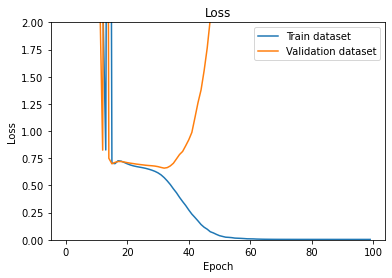

In [19]:
plt.title('Loss')
plt.plot(history.history['loss'], label='Train dataset')
plt.plot(history.history['val_loss'], label='Validation dataset')
plt.ylim(0,2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

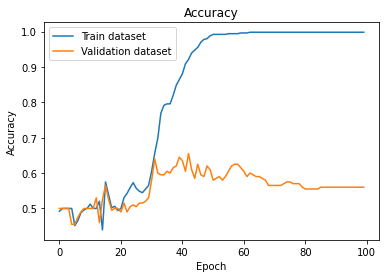

In [20]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Train dataset')
plt.plot(history.history['val_accuracy'], label='Validation dataset')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

matrix confusion

In [21]:
y_train_pred = model.predict(X_train)
y_train_pred

array([[1.42873841e-05],
       [1.27730971e-07],
       [2.40309128e-09],
       [1.00000000e+00],
       [1.16269688e-10],
       [3.62324317e-06],
       [7.69387498e-07],
       [9.77196368e-09],
       [8.59047213e-06],
       [1.57334867e-09],
       [9.99999046e-01],
       [3.14444304e-04],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99995649e-01],
       [1.11134892e-17],
       [1.00000000e+00],
       [1.00000000e+00],
       [5.99397083e-08],
       [1.67389285e-15],
       [2.44849207e-06],
       [1.00000000e+00],
       [1.07880254e-07],
       [3.31921779e-09],
       [6.18901365e-17],
       [1.00000000e+00],
       [9.99955535e-01],
       [1.00000000e+00],
       [4.61577065e-06],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99888837e-01],
       [4.34431397e-12],
       [4.06517240e-19],
       [7.21928166e-18],
       [1.00000000e+00],
       [2.25112050e-15],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],


In [22]:
y_train_pred.shape

(494, 1)

In [23]:
y_train_pred  = y_train_pred > 0.5
#y_train_pred  = (model.predict(generator_train)> 0.5).astype('int32').flatten()

In [24]:
y_train_pred

array([[False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [

In [25]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_train

array([[246,   1],
       [  0, 247]], dtype=int64)

In [26]:
y_val_pred = model.predict(X_val)
y_val_pred  = y_val_pred > 0.5

cm_val = confusion_matrix(y_val, y_val_pred)
cm_val

array([[54, 46],
       [42, 58]], dtype=int64)

In [27]:
from sklearn.metrics import classification_report

In [64]:
target_names = ['Alien 0', 'Predator 1']
print(classification_report(y_train, y_train_pred, target_names=target_names))

              precision    recall  f1-score   support

     Alien 0       0.67      0.74      0.71       247
  Predator 1       0.71      0.64      0.67       247

    accuracy                           0.69       494
   macro avg       0.69      0.69      0.69       494
weighted avg       0.69      0.69      0.69       494



In [28]:
target_names = ['Alien 0', 'Predator 1']
print(classification_report(y_val, y_val_pred, target_names=target_names))

              precision    recall  f1-score   support

     Alien 0       0.56      0.54      0.55       100
  Predator 1       0.56      0.58      0.57       100

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.56      0.56      0.56       200



#### save model

In [29]:
model.save('model')

INFO:tensorflow:Assets written to: model\assets


### affichage des images et create dataset with cv2

In [30]:
import glob
import cv2

In [31]:
img_files_alien = glob.glob("Data\Train\Alien\\*.jpg")

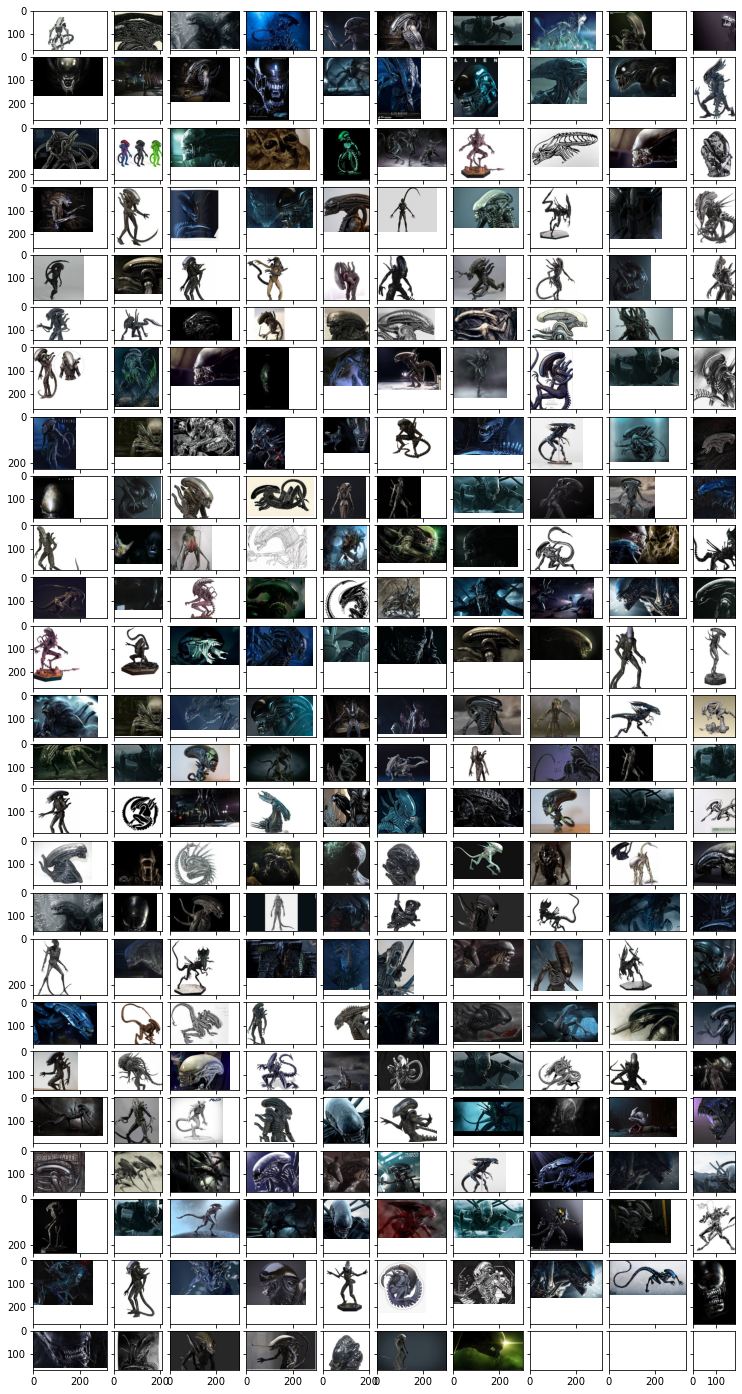

In [32]:
from mpl_toolkits.axes_grid1 import ImageGrid
#files = glob.glob("*.jpg")
fig = plt.figure(1, (25., 25.))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(25,10),
                 axes_pad=0.1)
for im in range(len(img_files_alien)):
    img_alien = cv2.imread(img_files_alien[im])
    img_alien = cv2.cvtColor(img_alien, cv2.COLOR_BGR2RGB) 
    grid[im].imshow(img_alien) 
plt.imshow(img_alien)

In [33]:
img_files_predator = glob.glob("Data\Train\Predator\\*.jpg")

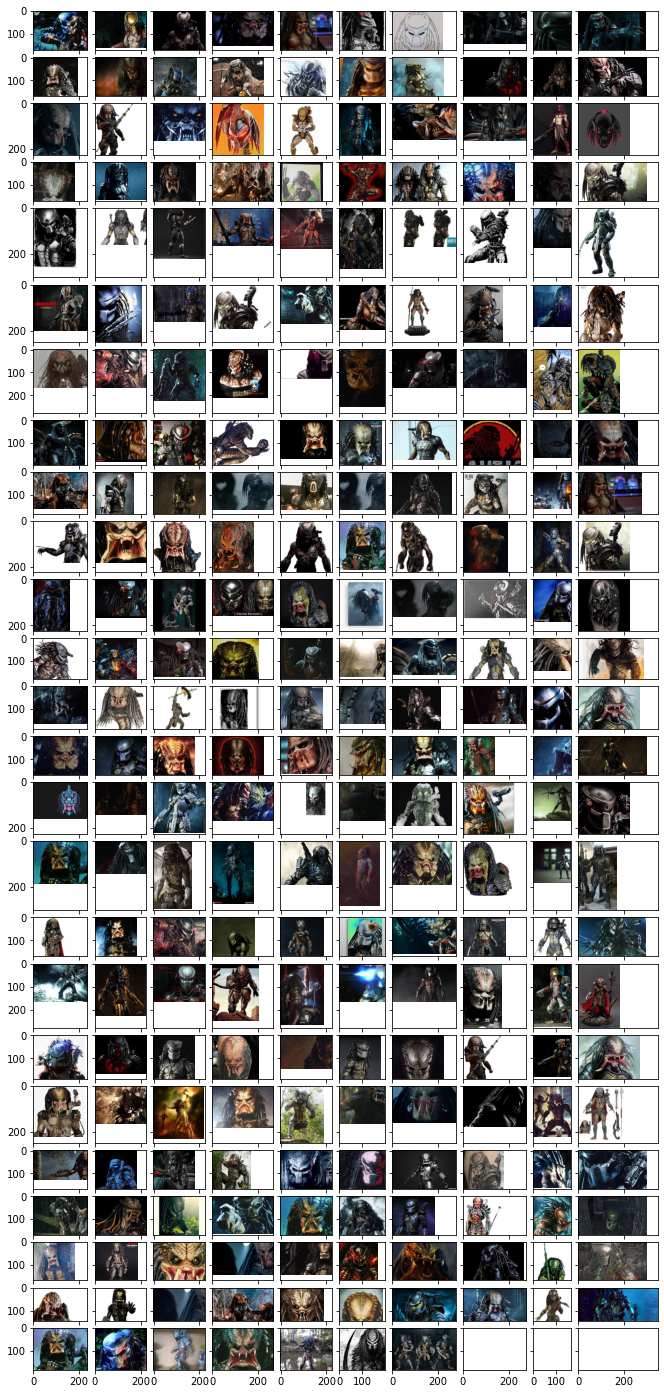

In [34]:
fig = plt.figure(1, (25., 25.))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(25,10),
                 axes_pad=0.1)
for im in range(len(img_files_predator)):
    img_p = cv2.imread(img_files_predator[im])
    img_p = cv2.cvtColor(img_p, cv2.COLOR_BGR2RGB) 
    grid[im].imshow(img_p) 
plt.imshow(img_p)

In [35]:
img_p.shape

(182, 277, 3)

### Dataset creation

Create a train dataset with a pair of image data and labels.

In [36]:
"""DATADIR = ""
os.listdir(os.path.join(DATADIR, category))"""

'DATADIR = ""\nos.listdir(os.path.join(DATADIR, category))'

In [37]:
DATADIR = "Data\Train"
CATEGORIES = ["Alien", "Predator"]
IMG_SIZE =150
training_data = []
for class_num, category in enumerate(CATEGORIES):
    path = os.path.join(DATADIR, category)
    print(class_num, category)
    for image_name in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, image_name), )
        img_resize_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([img_resize_array, class_num])

0 Alien
1 Predator


In [38]:
#training_data

In [39]:
random.shuffle(training_data)

In [40]:
X_train = []  # 画像データ
y_train = []  # ラベル情報
# データセット作成
for feature, label in training_data:
    X_train.append(feature)
    y_train.append(label)

In [41]:
# numpy配列に変換
X_train = np.array(X_train)
y_train = np.array(y_train)

In [42]:
X_train.shape

(494, 150, 150, 3)

train data label： 0
train data label： 1
train data label： 1
train data label： 1


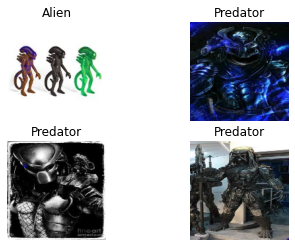

In [43]:
# check dataset
for i in range(0, 4):
    print("train data label：", y_train[i])
    plt.subplot(2, 2, i+1)
    plt.axis('off')
    plt.title(label = 'Alien' if y_train[i] == 0 else 'Predator')
    plt.imshow(X_train[i], cmap='gray')
plt.show()

Create a validation dataset with a pair of image data and labels.

In [44]:
path_v = os.path.join("Data\Validation", "Alien")
#img_v = cv2.imread("Validation/Alien\\247.jpg")
print(os.listdir(path_v))

['247.jpg', '248.jpg', '249.jpg', '250.jpg', '251.jpg', '252.jpg', '253.jpg', '254.jpg', '255.jpg', '256.jpg', '257.jpg', '258.jpg', '259.jpg', '260.jpg', '261.jpg', '262.jpg', '263.jpg', '264.jpg', '265.jpg', '266.jpg', '267.jpg', '268.jpg', '269.jpg', '270.jpg', '271.jpg', '272.jpg', '273.jpg', '274.jpg', '275.jpg', '276.jpg', '277.jpg', '278.jpg', '279.jpg', '280.jpg', '281.jpg', '282.jpg', '283.jpg', '284.jpg', '285.jpg', '286.jpg', '287.jpg', '288.jpg', '289.jpg', '290.jpg', '291.jpg', '292.jpg', '293.jpg', '294.jpg', '295.jpg', '296.jpg', '297.jpg', '298.jpg', '299.jpg', '300.jpg', '301.jpg', '302.jpg', '303.jpg', '304.jpg', '305.jpg', '306.jpg', '307.jpg', '308.jpg', '309.jpg', '310.jpg', '311.jpg', '312.jpg', '313.jpg', '314.jpg', '315.jpg', '316.jpg', '317.jpg', '318.jpg', '319.jpg', '320.jpg', '321.jpg', '322.jpg', '323.jpg', '324.jpg', '325.jpg', '326.jpg', '327.jpg', '328.jpg', '329.jpg', '330.jpg', '331.jpg', '332.jpg', '333.jpg', '334.jpg', '335.jpg', '336.jpg', '337.jpg'

In [45]:
DATADIR_v = "Data\Validation"
CATEGORIES = ["Alien", "Predator"]
IMG_SIZE =150
validation_data = []
for class_num, category in enumerate(CATEGORIES):
    path_v = os.path.join(DATADIR_v, category)
    print(path_v)
    for image_name in os.listdir(path_v):
        img_array_v = cv2.imread(os.path.join(path_v, image_name), )
        img_resize_array_v = cv2.resize(img_array_v, (IMG_SIZE, IMG_SIZE))
        validation_data.append([img_resize_array_v, class_num])

Data\Validation\Alien
Data\Validation\Predator


In [46]:
random.shuffle(validation_data)

In [47]:
X_val = []  # 画像データ
y_val = []  # ラベル情報
# データセット作成
for feature, label in validation_data:
    X_val.append(feature)
    y_val.append(label)

In [48]:
# numpy配列に変換
X_val = np.array(X_val)
y_val = np.array(y_val)

In [49]:
X_val.shape

(200, 150, 150, 3)

label of validation data： 1
label of validation data： 0
label of validation data： 0
label of validation data： 0


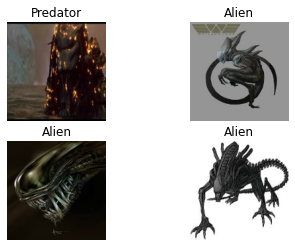

In [50]:
# データセットの確認
for i in range(0, 4):
    print("label of validation data：", y_val[i])
    plt.subplot(2, 2, i+1)
    plt.axis('off')
    plt.title(label = 'Alien' if y_val[i] == 0 else 'Predator')
    plt.imshow(X_val[i], cmap='jet')
plt.show()

### create a model

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers 
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [52]:
model_cv2 = Sequential()
model_cv2.add(layers.Conv2D(filters=16, kernel_size=3, strides=1, activation='relu', input_shape=(150, 150, 3)))
model_cv2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_cv2.add(layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu'))
model_cv2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_cv2.add(layers.Conv2D(filters=64, kernel_size=3, strides=1, activation='relu'))
model_cv2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_cv2.add(layers.Flatten())
model_cv2.add(layers.Dense(units=512, activation='relu'))
model_cv2.add(layers.Dense(units=1, activation='sigmoid'))

In [53]:
model_cv2.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.01),
              metrics=['accuracy'])

In [54]:
model_cv2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

In [55]:
history_cv2 = model_cv2.fit(
    x=X_train,
    y=y_train,
    batch_size=X_train.shape[0],
    epochs=100,
    validation_data=(X_val,y_val),
    shuffle=True
)

Epoch 1/100
1/1 [==============================] - 15s 15s/step - loss: 14.0111 - accuracy: 0.4879 - val_loss: 52254.8594 - val_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 14s 14s/step - loss: 54174.2695 - accuracy: 0.5000 - val_loss: 1171.8737 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 14s 14s/step - loss: 1214.6268 - accuracy: 0.5000 - val_loss: 78.4506 - val_accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 13s 13s/step - loss: 75.5235 - accuracy: 0.5000 - val_loss: 28.3216 - val_accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 13s 13s/step - loss: 27.9106 - accuracy: 0.5000 - val_loss: 16.3472 - val_accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 13s 13s/step - loss: 15.8594 - accuracy: 0.5000 - val_loss: 10.5034 - val_accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 13s 13s/step - loss: 10.0871 - accuracy: 0.5000 - val_loss: 10.8225 - val_accuracy: 0.4

Epoch 59/100
1/1 [==============================] - 10s 10s/step - loss: 0.4303 - accuracy: 0.7328 - val_loss: 3.1515 - val_accuracy: 0.5250
Epoch 60/100
1/1 [==============================] - 10s 10s/step - loss: 0.4270 - accuracy: 0.7348 - val_loss: 3.3535 - val_accuracy: 0.5400
Epoch 61/100
1/1 [==============================] - 10s 10s/step - loss: 0.4206 - accuracy: 0.7409 - val_loss: 3.7636 - val_accuracy: 0.5350
Epoch 62/100
1/1 [==============================] - 10s 10s/step - loss: 0.4133 - accuracy: 0.7449 - val_loss: 4.2028 - val_accuracy: 0.5300
Epoch 63/100
1/1 [==============================] - 10s 10s/step - loss: 0.4063 - accuracy: 0.7530 - val_loss: 4.3957 - val_accuracy: 0.5300
Epoch 64/100
1/1 [==============================] - 11s 11s/step - loss: 0.4009 - accuracy: 0.7530 - val_loss: 4.2409 - val_accuracy: 0.5300
Epoch 65/100
1/1 [==============================] - 11s 11s/step - loss: 0.4001 - accuracy: 0.7510 - val_loss: 4.5122 - val_accuracy: 0.5300
Epoch 66/100


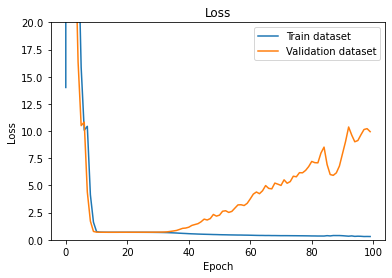

In [56]:
plt.title('Loss')
plt.plot(history_cv2.history['loss'], label='Train dataset')
plt.plot(history_cv2.history['val_loss'], label='Validation dataset')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0,20)
plt.legend()
plt.show()

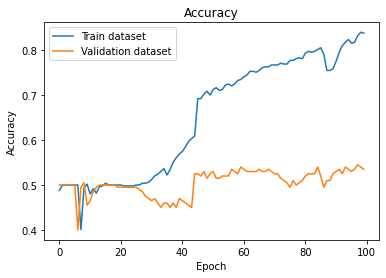

In [57]:
plt.title('Accuracy')
plt.plot(history_cv2.history['accuracy'], label='Train dataset')
plt.plot(history_cv2.history['val_accuracy'], label='Validation dataset')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [58]:
model.save('model_cv2')

INFO:tensorflow:Assets written to: model_cv2\assets


matrix de confusion pour train

In [59]:
y_train_pred = model.predict(X_train)

In [65]:
#y_train_pred

In [61]:
y_train_pred  = y_train_pred > 0.5

In [62]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_train

array([[183,  64],
       [ 89, 158]], dtype=int64)

In [63]:
y_val_pred = model.predict(X_val)> 0.5
cm_val = confusion_matrix(y_val, y_val_pred)
cm_val

array([[59, 41],
       [52, 48]], dtype=int64)

#オリジナルの画像からデータセットを作成する方法 

https://intellectual-curiosity.tokyo/2019/07/02/%E3%82%AA%E3%83%AA%E3%82%B8%E3%83%8A%E3%83%AB%E3%81%AE%E7%94%BB%E5%83%8F%E3%81%8B%E3%82%89%E3%83%87%E3%83%BC%E3%82%BF%E3%82%BB%E3%83%83%E3%83%88%E3%82%92%E4%BD%9C%E6%88%90%E3%81%99%E3%82%8B%E6%96%B9/

https://child-programmer.com/ai/cnn-originaldataset-samplecode-description/

https://qiita.com/kenichiro-yamato/items/60affeb7ca9f67c87a17

matplotlibのcmap(colormap)パラメータ
https://beiznotes.org/matplot-cmap-list/